# 2. Projekat iz predmeta Mašinsko učenje

[Credit Card Customer Segmentation Data](https://www.kaggle.com/datasets/busraatasoy/credit-card-customer-segmentation-data)

Marija Cvetković 1940 \
Luka Kocić 2022

Atributi:
- `customer_id` — jedinstveni identifikator korisnika
- `age` — starost korisnika
- `gender` — pol
- `dependent_count` — broj izdržavanih lica
- `education_level` — nivo obrazovanja
- `marital_status` — bračni status
- `estimated_income` — procenjena godišnja zarada
- `months_on_book` — broj meseci koliko je klijent u banci
- `total_relationship_count` — ukupan broj proizvoda koje koristi
- `months_inactive_12_mon` — broj neaktivnih meseci u poslednjih 12
- `credit_limit` — kreditni limit
- `total_trans_amount` — ukupan iznos transakcija
- `total_trans_count` — ukupan broj transakcija
- `avg_utilization_ratio` — prosečna stopa iskorišćenosti kredita

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv("customer-segmentation.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [3]:
df.drop(columns=["customer_id"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10127 non-null  int64  
 1   gender                    10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   education_level           10127 non-null  object 
 4   marital_status            10127 non-null  object 
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [4]:
df.describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [5]:
df.isnull().sum()

age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [6]:
df.duplicated().any()

np.False_

In [7]:
print("Broj jedinstvenih vrednosti po koloni:")
print(df.nunique())

print("\n--- Kategoričke kolone ---")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}: {df[col].unique()}")

Broj jedinstvenih vrednosti po koloni:
age                           45
gender                         2
dependent_count                6
education_level                6
marital_status                 4
estimated_income             181
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
credit_limit                6205
total_trans_amount          5033
total_trans_count            126
avg_utilization_ratio        964
dtype: int64

--- Kategoričke kolone ---

gender: ['M' 'F']

education_level: ['High School' 'Graduate' 'Uneducated' 'Post-Graduate' 'College'
 'Doctorate']

marital_status: ['Married' 'Single' 'Unknown' 'Divorced']


## Enkodiranje podataka

Postoje 3 kategoričke kolone: gender, education_level i marital_status. One će biti enkodirane na sledeći način:
- Gender: potrebno je proizvoljno enkodirati pol binarno, u našem slučaju je iskorišćen LabelEncoder (do istog rezultata bi se došlo i korišćenjem nekog drugog enkodera)
- Education level: kategorije su uporedive, pa ćemo koristiti ordinal encoder
- Martial status: korišćen je one-hot encoding, jer svaka kategorija ima podjednaku težinu

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

X = df.copy()

gender_col = ['gender']
education_col = ['education_level']
marital_col = ['marital_status']

num_cols = X.drop(columns=gender_col + education_col + marital_col).columns.tolist()
X_num = X[num_cols].to_numpy(dtype=float)

education_encoder = OrdinalEncoder(categories=[[
    "Uneducated",
    "High School",
    "College",
    "Graduate",
    "Post-Graduate",
    "Doctorate"
]])
marital_encoder = OneHotEncoder(sparse_output=False)

X_gender = df['gender'].map({'M': 0, 'F': 1}).values.reshape(-1, 1)
X_education = education_encoder.fit_transform(X[education_col])
X_marital = marital_encoder.fit_transform(X[marital_col])

marital_feature_names = marital_encoder.get_feature_names_out(marital_col).tolist()

all_columns = (
    num_cols
    + gender_col
    + education_col
    + marital_feature_names
)

X_encoded = np.hstack([X_num, X_gender, X_education, X_marital])

df = pd.DataFrame(X_encoded, columns=all_columns)

encoded_cols = (
    gender_col
    + education_col
    + marital_feature_names
)

df[encoded_cols].head()

,gender,education_level,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,3.0,0.0,0.0,1.0,0.0
2,0.0,3.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0


## Analiza numeričkih podataka

Pregledom raspodele vrednosti numeričkih podataka (histogrami) može se videti da su podaci logični i da verno oslikavaju realno ponašanje klijenata u bankarskom sektoru:

- `age` (starost korisnika): Približno normalna raspodela. Ovo je očekivano jer najveći deo klijenata banke čine radno sposobni ljudi srednjih godina, dok je manje jako mladih ili jako starih klijenata.
- `dependent_count` (broj izdržavanih lica): Relativno ravnomerna raspodela sa najviše korisnika koji imaju 2 ili 3 izdržavana lica, što odgovara prosečnoj veličini porodice.
- `estimated_income` (procenjena godišnja zarada): Izrazito desno iskošena raspodela, većina populacije ima prosečna ili niža primanja, dok samo mali procenat klijenata ima izuzetno visoke zarade.
- `months_on_book` (broj meseci koliko je klijent u banci): Približno normalna raspodela, sa izraženim pikom oko 36 meseci (3 godine), što ukazuje na stabilnu bazu klijenata i prosečno vreme zadržavanja.
- `total_relationship_count` (ukupan broj proizvoda koje koristi): Raspodela je relativno ravnomerna, što pokazuje da klijenti koriste različit spektar bankarskih usluga.
- `months_inactive_12_mon` (broj neaktivnih meseci u poslednjih 12): Blago desno iskošena raspodela. Većina korisnika je neaktivna 1 do 3 meseca, što je normalno za povremeno korišćenje kartica, dok su duži periodi neaktivnosti ređi.
- `credit_limit` (kreditni limit): Izrazito desno iskošena raspodela. Banke većini klijenata odobravaju standardne, niže limite, dok se visoki limiti (preko 30000) odobravaju samo malom broju klijenata sa visokim primanjima i dobrim kreditnim rejtingom.
- `total_trans_amount` (ukupan iznos transakcija): Izrazito desno iskošena raspodela. Većina klijenata troši prosečne iznose, dok manji broj klijenata pravi transakcije velikih vrednosti.
- `total_trans_count` (ukupan broj transakcija): Približno normalna raspodela. Oslikava postojanje različitih grupa korisnika (onih koji karticu koriste svakodnevno i onih koji je koriste povremeno).
- `avg_utilization_ratio` (prosečna stopa iskorišćenosti kredita): Desno iskošena raspodela. Veliki broj korisnika ima stopu iskorišćenosti 0 jer mnogi klijenti redovno izmiruju svoje obaveze u celosti ili uopšte ne ulaze u dozvoljeni minus.

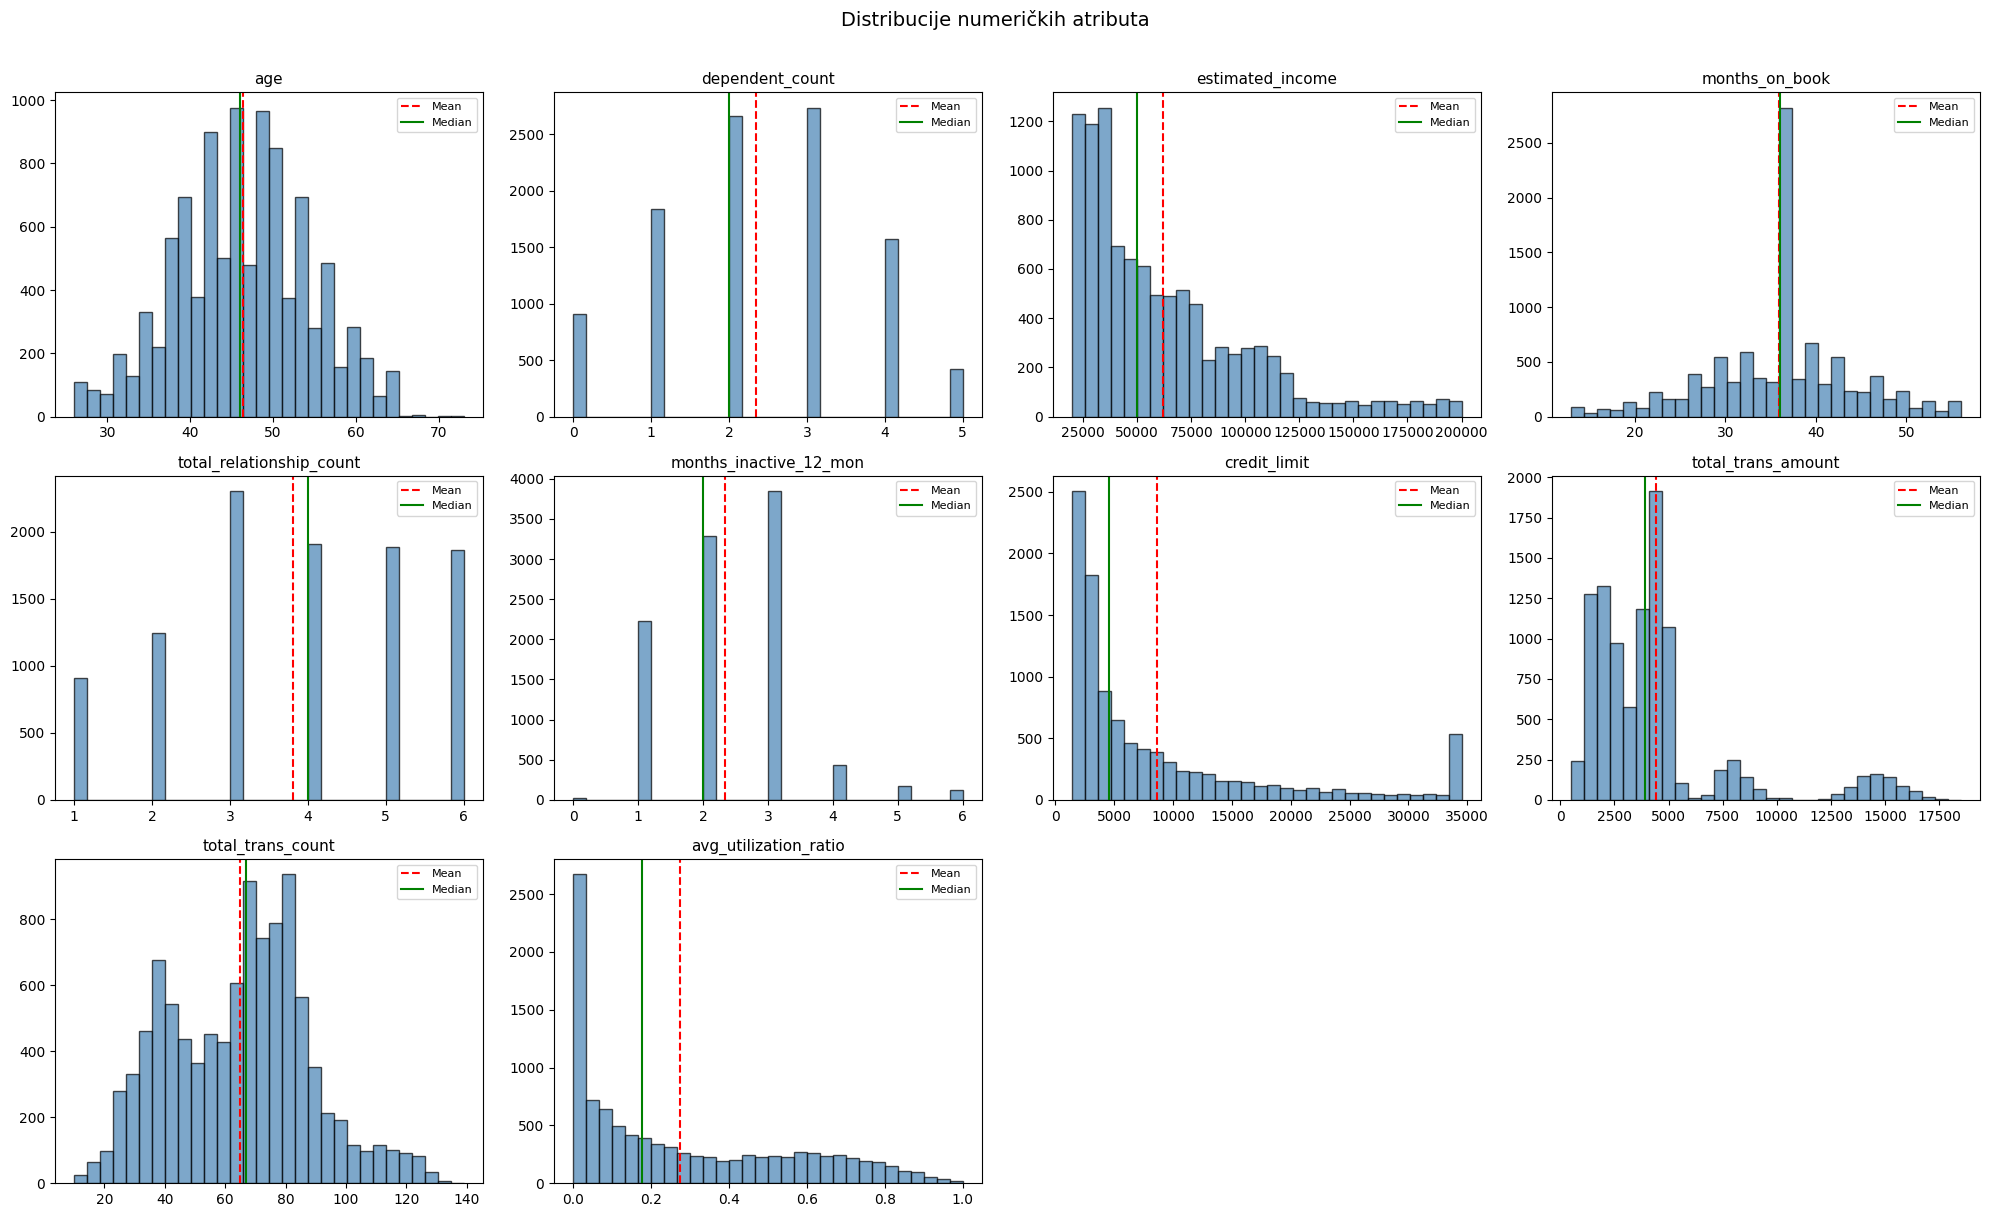

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(col, fontsize=11)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', label='Median')
    axes[i].legend(fontsize=8)

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribucije numeričkih atributa", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

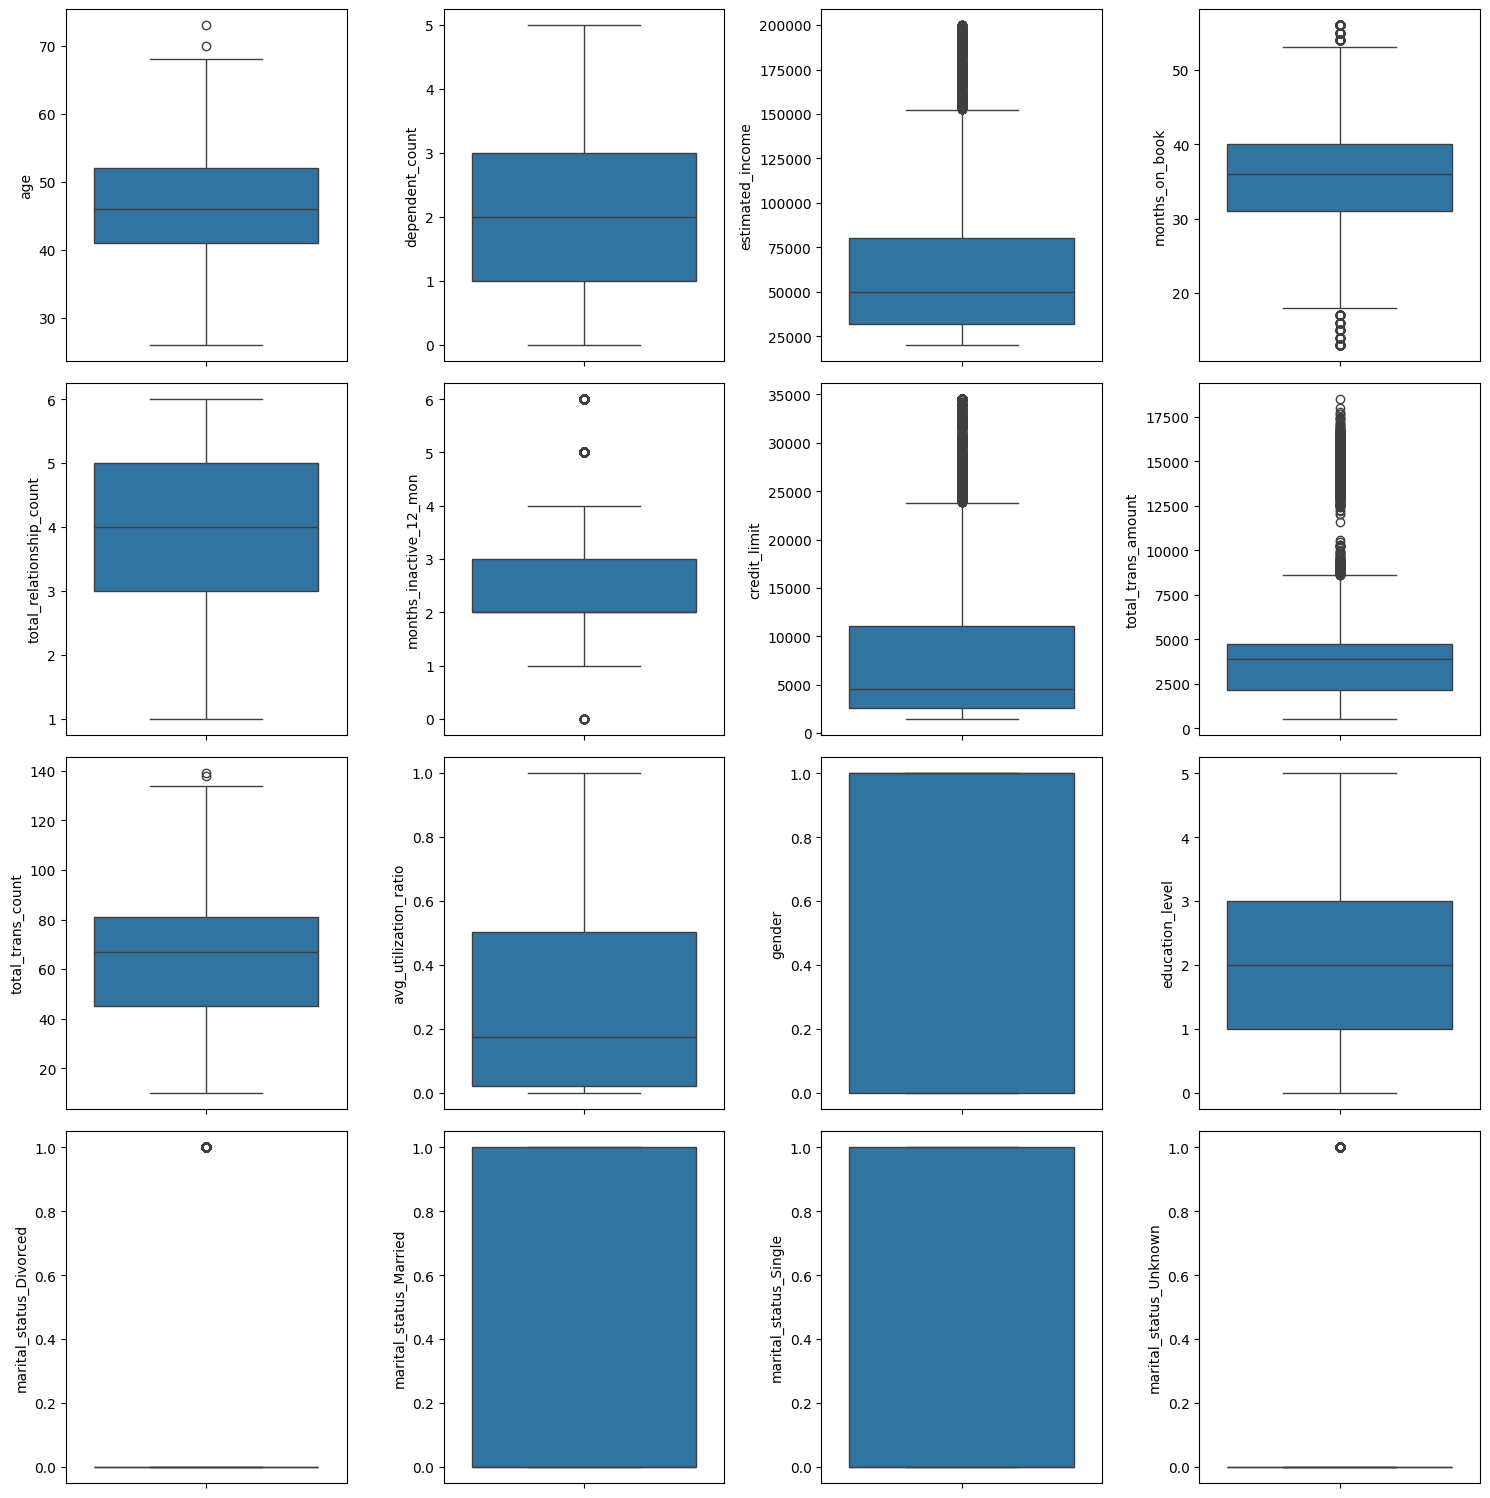

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,30))
for i in range(len(df.columns)):
    fig.add_subplot(8,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [12]:
iqr_mask = pd.Series(False, index=df.index)
zscore_mask = pd.Series(False, index=df.index)

outlier_info = {}
for column in num_cols:
    # IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    donja = Q1 - 1.5 * IQR
    gornja = Q3 + 1.5 * IQR

    iqr_mask |= (df[column] < donja) | (df[column] > gornja)
    n_outliers = ((df[column] < donja) | (df[column] > gornja)).sum()
    outlier_info[column] = {'count': n_outliers, 'pct': n_outliers / len(df) * 100,
                             'lower': donja, 'upper': gornja}

    # Z-score
    std = df[column].std()
    if std != 0:
        z = (df[column] - df[column].mean()) / std
        zscore_mask |= (z > 3) | (z < -3)

print(f"Broj redova sa bar jednim IQR outlierom: {iqr_mask.sum()}")
print(f"Broj redova sa bar jednim Z-score outlierom: {zscore_mask.sum()}")

print("\nOutlier-i po kolonama (IQR metoda):")
print(f"{'Kolona':<30} {'Broj':>6} {'%':>8}")
print("-" * 46)
for col, info in outlier_info.items():
    if info['count'] > 0:
        print(f"{col:<30} {info['count']:>6} {info['pct']:>7.1f}%")

Broj redova sa bar jednim IQR outlierom: 2530
Broj redova sa bar jednim Z-score outlierom: 699

Outlier-i po kolonama (IQR metoda):
Kolona                           Broj        %
----------------------------------------------
age                                 2     0.0%
estimated_income                  469     4.6%
months_on_book                    386     3.8%
months_inactive_12_mon            331     3.3%
credit_limit                      984     9.7%
total_trans_amount                896     8.8%
total_trans_count                   2     0.0%


Nećemo sklanjati outliere jer su svi podaci smisleni, tj najverovatnije će doći do formiranja klastera tih korisnika.

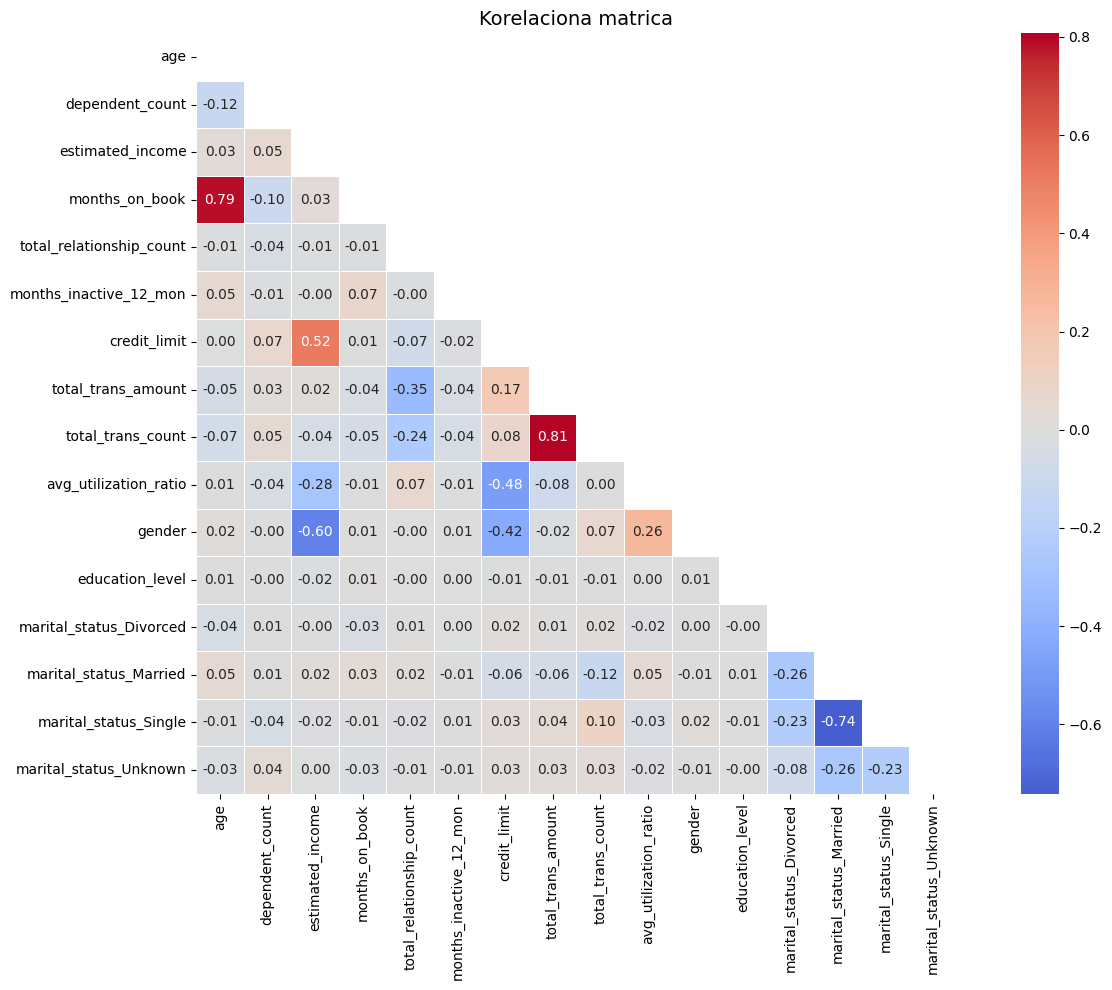

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, square=True)
plt.title("Korelaciona matrica", fontsize=14)
plt.tight_layout()
plt.show()

Na osnovu korelacione matrice možemo uočiti nekoliko značajnih veza između atributa koje su logične i očekivane:

1. **`total_trans_count` i `total_trans_amount` (0.81)**
   - Klijenti koji češće koriste karticu (veći broj transakcija) logično prave i veći ukupan promet (veći iznos transakcija).
2. **`months_on_book` i `age` (0.79)**
   - Stariji klijenti su duže vreme prisutni u banci, pa je samim tim i broj meseci od kada su klijenti banke veći.
3. **`gender` i `estimated_income` (0.60)**
   - Postoji značajna korelacija između pola i procenjene godišnje zarade. S obzirom na to kako je pol enkodiran, ovo ukazuje na razliku u prosečnim primanjima između muških i ženskih klijenata u ovom skupu podataka.
4. **`credit_limit` i `estimated_income` (0.52)**
   - Banke odobravaju veće kreditne limite klijentima koji imaju veća procenjena primanja, jer oni predstavljaju manji rizik za banku.
5. **`avg_utilization_ratio` i `credit_limit` (-0.48)**
   - Klijenti sa jako visokim kreditnim limitima retko koriste ceo iznos svog limita, pa je njihova prosečna stopa iskorišćenosti niska. Sa druge strane, klijenti sa malim limitima češće iskoriste veći procenat svog dozvoljenog minusa.

## Klasterizacija

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

X_scaled = StandardScaler().fit_transform(df)
X_pca3 = PCA(n_components=3).fit_transform(X_scaled)
labels = KMeans(n_clusters=4, random_state=42, n_init=10).fit_predict(X_pca3)

fig = px.scatter_3d(x=X_pca3[:, 0], y=X_pca3[:, 1], z=X_pca3[:, 2],
                    color=labels.astype(str),
                    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3', 'color': 'Klaster'},
                    title='KMeans (k=4) na PCA 3D')
fig.update_traces(marker_size=3)
fig.show()

### K-Means

          variant  before_best_k  before_best_sil  before_elbow_k  after_best_k  after_best_sil  after_elbow_k  pca_n_components  pca_explained_var
0    MinMaxScaler              6         0.309932               6             6        0.819632              5                 3           0.576211
1    RobustScaler              2         0.299976               5             2        0.473140              4                 3           0.547849
2  StandardScaler              5         0.160016               6             2        0.278659              4                 3           0.390475


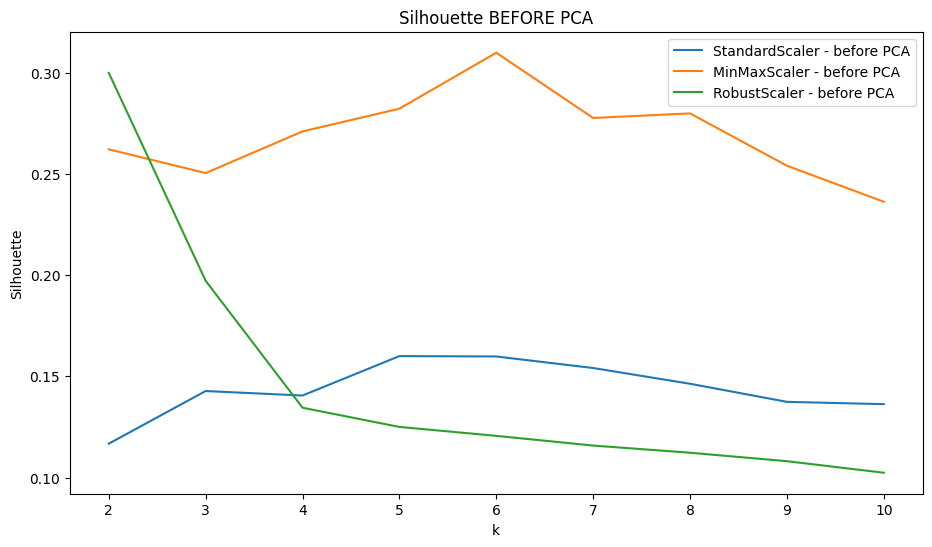

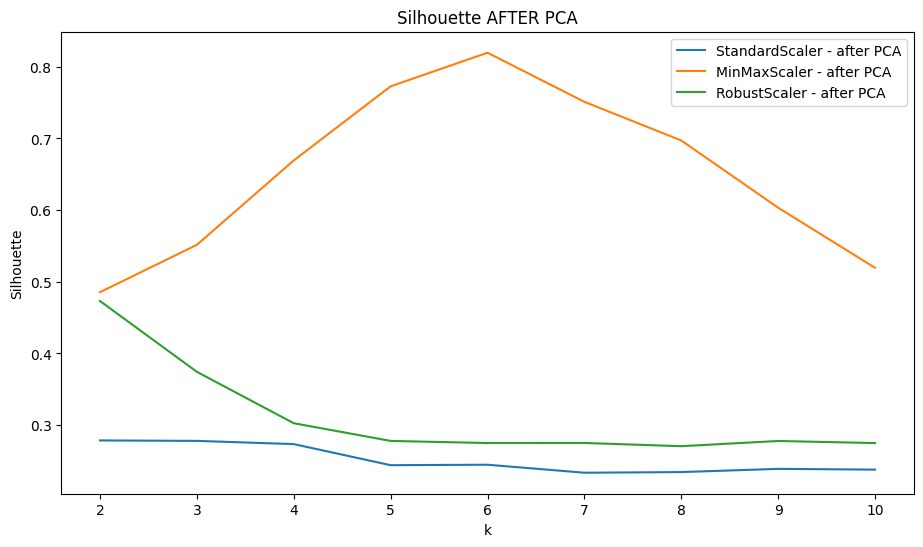

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from kneed import KneeLocator

kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

def evaluate_kmeans(X_mat, k_list):
    sse = []
    sil = []

    for k in k_list:
        km = KMeans(n_clusters=k, **kmeans_kwargs)
        labels = km.fit_predict(X_mat)
        sse.append(km.inertia_)

        if k >= 2:
            sil.append(silhouette_score(X_mat, labels))
        else:
            sil.append(None)

    kl = KneeLocator(k_list, sse, curve="convex", direction="decreasing")
    elbow_k = kl.elbow

    sil_pairs = [(k, s) for k, s in zip(k_list, sil) if s is not None]
    best_sil_k, best_sil = max(sil_pairs, key=lambda x: x[1])

    return sse, sil, elbow_k, best_sil_k, best_sil


scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
}

K = list(range(2, 11))

N_COMPONENTS = 3

results = {}
rows = []

for name, scaler in scalers.items():
    X0 = df.to_numpy(dtype=float)
    X_scaled = X0 if scaler is None else scaler.fit_transform(X0)

    sse_b, sil_b, elbow_b, bestk_b, bestsil_b = evaluate_kmeans(X_scaled, K)

    pca_full = PCA(n_components=N_COMPONENTS, random_state=42)
    X_pca_full = pca_full.fit_transform(X_scaled)

    sse_a, sil_a, elbow_a, bestk_a, bestsil_a = evaluate_kmeans(X_pca_full, K)

    results[name] = {
        "X_scaled": X_scaled,
        "X_pca_full": X_pca_full,
        "sse_before": sse_b,
        "sil_before": sil_b,
        "elbow_before": elbow_b,
        "bestk_before": bestk_b,
        "bestsil_before": bestsil_b,
        "sse_after": sse_a,
        "sil_after": sil_a,
        "elbow_after": elbow_a,
        "bestk_after": bestk_a,
        "bestsil_after": bestsil_a,
        "pca_components": X_pca_full.shape[1],
        "pca_explained": float(np.sum(pca_full.explained_variance_ratio_))
    }

    rows.append({
        "variant": name,
        "before_best_k": int(bestk_b),
        "before_best_sil": float(bestsil_b),
        "before_elbow_k": None if elbow_b is None else int(elbow_b),
        "after_best_k": int(bestk_a),
        "after_best_sil": float(bestsil_a),
        "after_elbow_k": None if elbow_a is None else int(elbow_a),
        "pca_n_components": int(X_pca_full.shape[1]),
        "pca_explained_var": results[name]["pca_explained"],
    })

summary = pd.DataFrame(rows).sort_values(by="after_best_sil", ascending=False).reset_index(drop=True)
print(summary)


plt.figure(figsize=(11, 6))
for name in scalers.keys():
    sil_vals = [s for k, s in zip(K, results[name]["sil_before"]) if k >= 2]
    plt.plot(K, sil_vals, label=f"{name} - before PCA")
plt.xticks(K)
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("Silhouette BEFORE PCA")
plt.legend()
plt.show()

plt.figure(figsize=(11, 6))
for name in scalers.keys():
    sil_vals = [s for k, s in zip(K, results[name]["sil_after"]) if k >= 2]
    plt.plot(K, sil_vals, label=f"{name} - after PCA")
plt.xticks(K)
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("Silhouette AFTER PCA")
plt.legend()
plt.show()



def plot_before_after(variant_name, k=None):
    X_scaled = results[variant_name]["X_scaled"]
    X_pca_full = results[variant_name]["X_pca_full"]

    if k is None:
        k = results[variant_name]["bestk_after"]

    km_before = KMeans(n_clusters=k, **kmeans_kwargs)
    labels_before = km_before.fit_predict(X_scaled)
    X_plot_before = PCA(n_components=3, random_state=42).fit_transform(X_scaled)

    km_after = KMeans(n_clusters=k, **kmeans_kwargs)
    labels_after = km_after.fit_predict(X_pca_full)
    X_plot_after = X_pca_full[:, :3]

    fig_before = px.scatter_3d(
        x=X_plot_before[:, 0], y=X_plot_before[:, 1], z=X_plot_before[:, 2],
        color=labels_before.astype(str),
        labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3', 'color': 'Klaster'},
        title=f"{variant_name}: BEFORE PCA (KMeans on scaled) shown in PCA 3D"
    )
    fig_before.update_traces(marker_size=3)
    fig_before.show()

    fig_after = px.scatter_3d(
        x=X_plot_after[:, 0], y=X_plot_after[:, 1], z=X_plot_after[:, 2],
        color=labels_after.astype(str),
        labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3', 'color': 'Klaster'},
        title=f"{variant_name}: AFTER PCA (KMeans in PCA space) — PCA kept {N_COMPONENTS} components"
    )
    fig_after.update_traces(marker_size=3)
    fig_after.show()


plot_before_after("MinMaxScaler")
plot_before_after("StandardScaler")

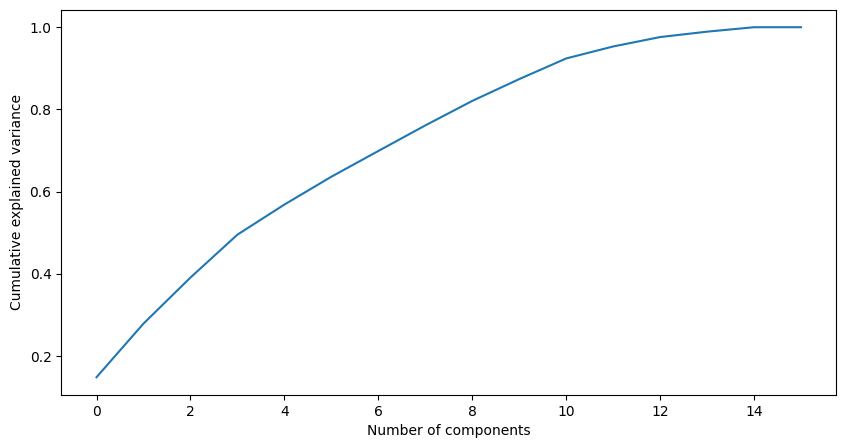

In [20]:
from sklearn.decomposition import PCA

X_scaled_test = StandardScaler().fit_transform(df)

pca = PCA()
pca.fit(X_scaled_test)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_test)

## Agglomerative Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

agglomerative = AgglomerativeClustering(n_clusters=4)
agglomerative_clusters = agglomerative.fit_predict(X_pca)

fig = px.scatter_3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
                    color=agglomerative_clusters.astype(str),
                    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3', 'color': 'Klaster'},
                    title='Agglomerative Clustering (k=4) na PCA 3D')
fig.update_traces(marker_size=3)
fig.show()

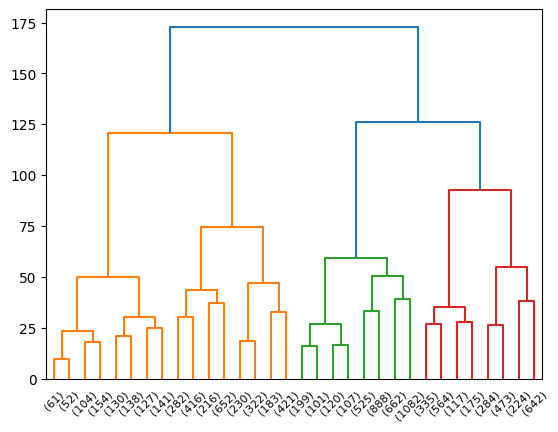

In [26]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'), truncate_mode='level', p=4)

## DBSCAN

In [24]:
from sklearn.cluster import DBSCAN
import plotly.express as px

dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(X_pca)

fig = px.scatter_3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
                    color=y_dbscan.astype(str),
                    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3', 'color': 'Klaster'},
                    title='DBSCAN na PCA 3D')
fig.update_traces(marker_size=3)
fig.show()
